<a href="https://colab.research.google.com/github/nagpureyogesh/Capstone-3/blob/main/Mobile_price_range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing  all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_data = pd.read_csv('/content/data_mobile_price_range.csv')

In [ ]:
df_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
#to check the number of rows and colums in data set
df_data.shape

(2000, 21)

In [ ]:
df_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## DATA EXPLORATION

In [ ]:
#to get the information about dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


here we observed that the minimum value of px_height and sc_w is zero and we know that px_height and sc_w should never be zero ,So we need to handle this thing.


In [ ]:
# Now check the total numbers of phones with sc_w=0 by len function 
print(len(df_data[df_data.sc_w == 0]))
# Now check the total numbers of phones with px_height=0 by len function 
print(len(df_data[df_data.px_height == 0]))

180
2


In [ ]:
#then we replace 0 with the mean values from dataset 
df_data['sc_w'][df_data[df_data.sc_w == 0].index] = df_data.sc_w.mean()
df_data['px_height'][df_data[df_data.px_height == 0].index] = df_data.px_height.mean()

In [ ]:
#next is to check for duplicates
len(df_data[df_data.duplicated()])
     

0

here it is observed that there is no duplicates present in our dataset

In [ ]:
#Check for null values
df_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

in this dataset there is no null value ,so our dataset is ready for EDA

#Exploratory data analysis

# **price_range_of_mobile**

In [ ]:
# there are mobile phones in 4 price ranges. The number of elements is almost similar.

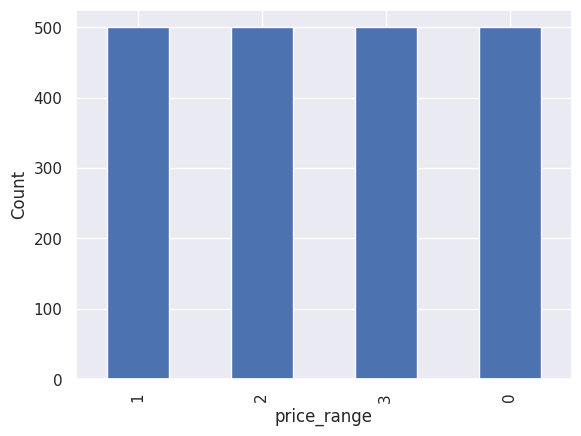

In [ ]:
#classes
sns.set()
price_plot=df_data['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

# **Bluetooth**

<Axes: xlabel='blue', ylabel='price_range'>

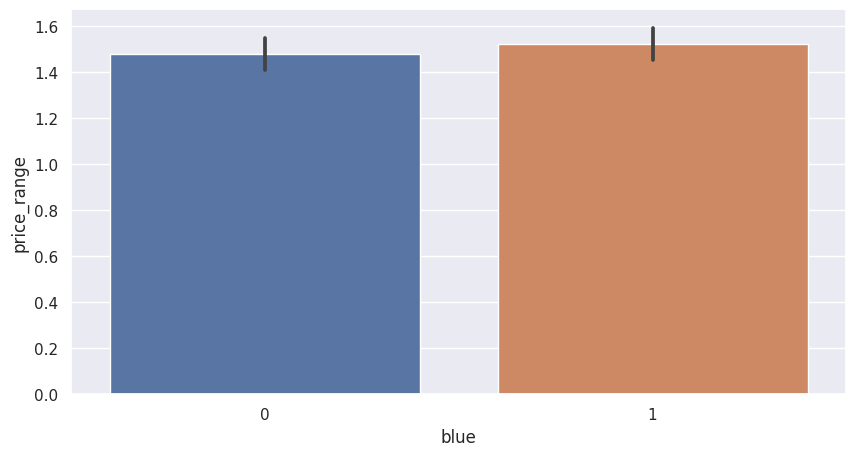

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data= df_data,x='blue',y='price_range',ax=ax)

 half the devices have Bluetooth, and half don’t

# **ram**

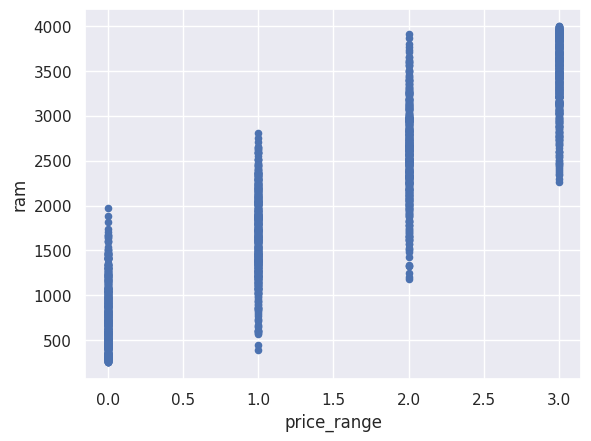

In [ ]:
df_data.plot(x='price_range',y='ram',kind='scatter')
plt.show()

Ram has continuous increase with price range while moving from Low cost to Very high cost


# **Battery_power_of_mobile** 

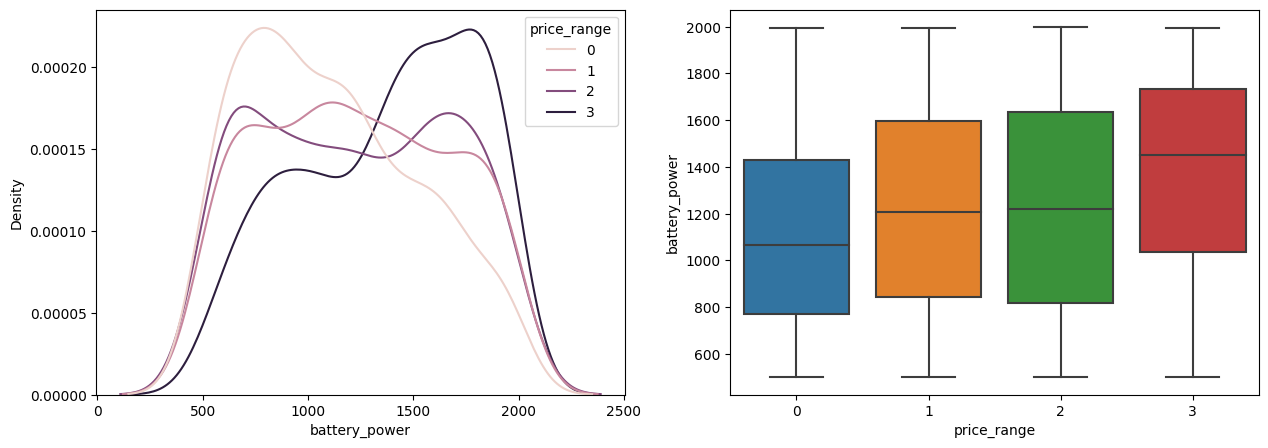

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='battery_power', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='battery_power', ax=axs[1])
plt.show()

Here we can notice clear distribution difference for price_range-0 and price_range-3.

* Mobiles in price_range-0 mostly have lower battery power.
* Mobiles in price_range-3 mostly have higher battery power.
* Mobiles in price_range-1 and price_range-2 also showing some variation in distribtion.


Based on these observations, we can conclude that this feature would be importand for predicting price_range.

# **clock speed**

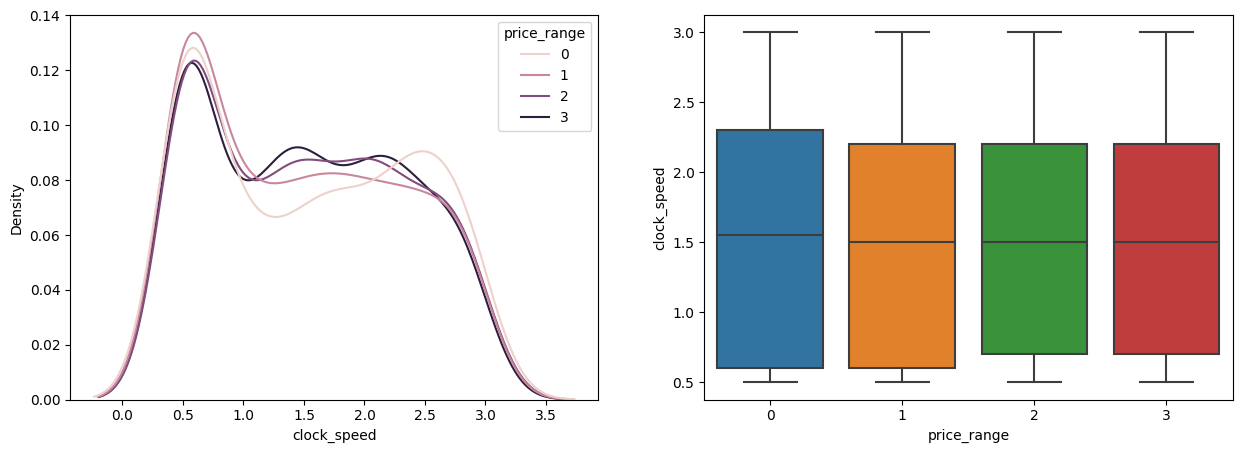

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='clock_speed', hue='price_range',ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='clock_speed', ax=axs[1])
plt.show()

The Clock Speed distribution is very similar along all the price ranges except 0 , which is a little different.

# FC front camera megapixels

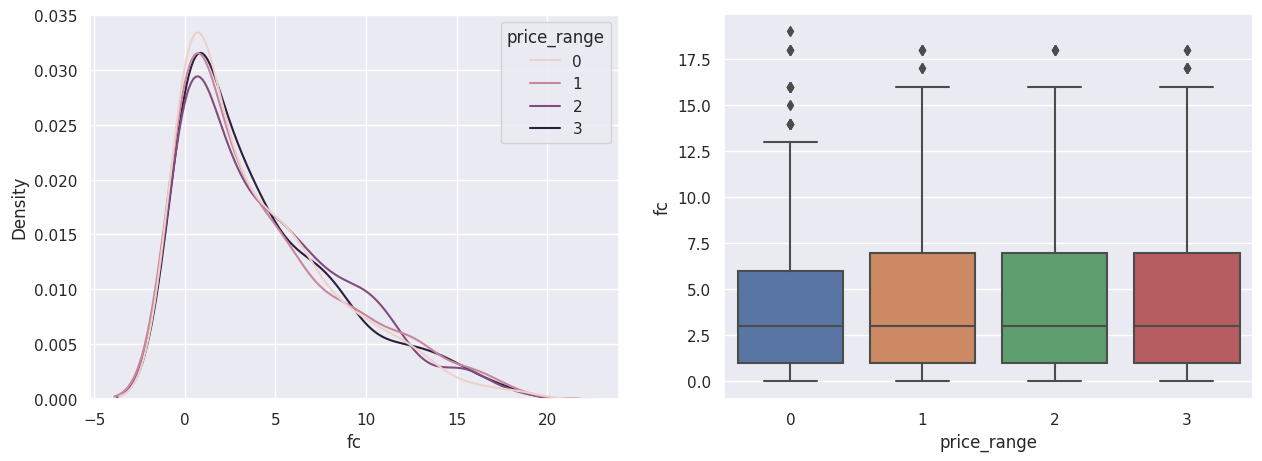

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='fc', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='fc', ax=axs[1])
plt.show()

This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions.

# internal memory

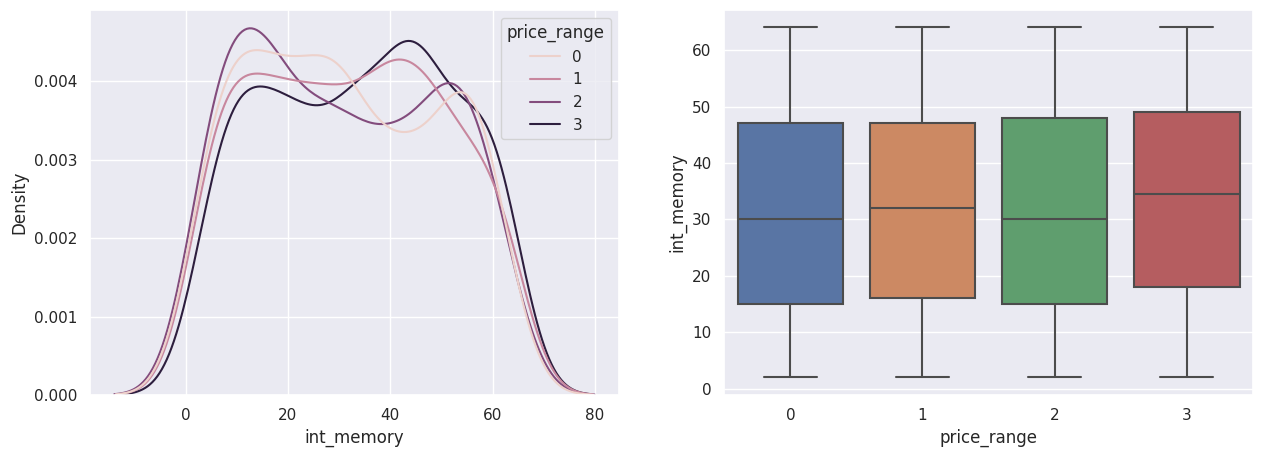

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='int_memory', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='int_memory', ax=axs[1])
plt.show()


There is a little variation in the Internal Memory along the Price range. Mobiles with higher price seems to have higher internal memory. This feature could be helpful in predicting the Price range

# mobile depth

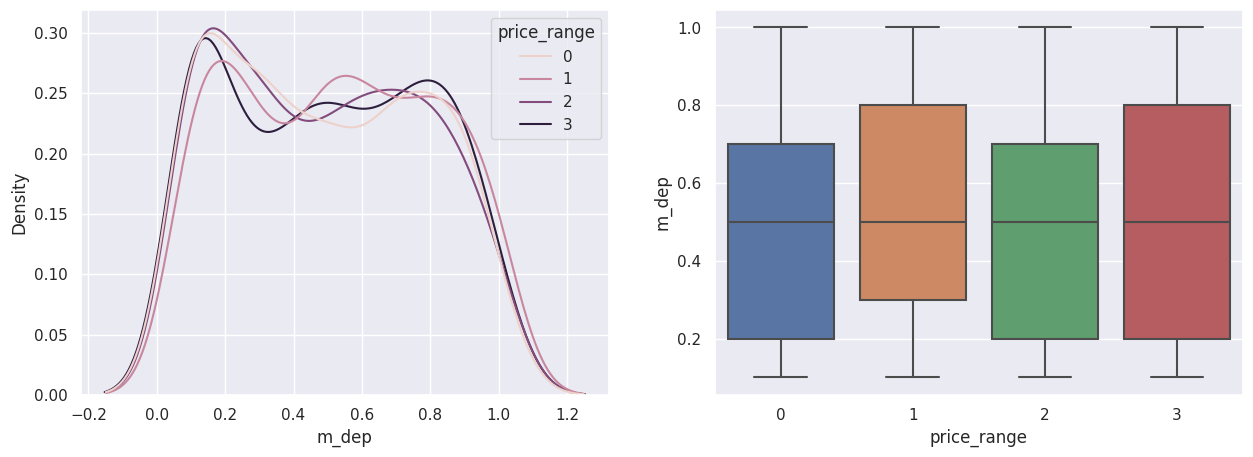

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='m_dep', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='m_dep', ax=axs[1])
plt.show()
     

Mobile depth again has somewhat similar kind of distribution along all the price_ranges. It's not gonna be a driving factor for deciding price.

# mobile weight

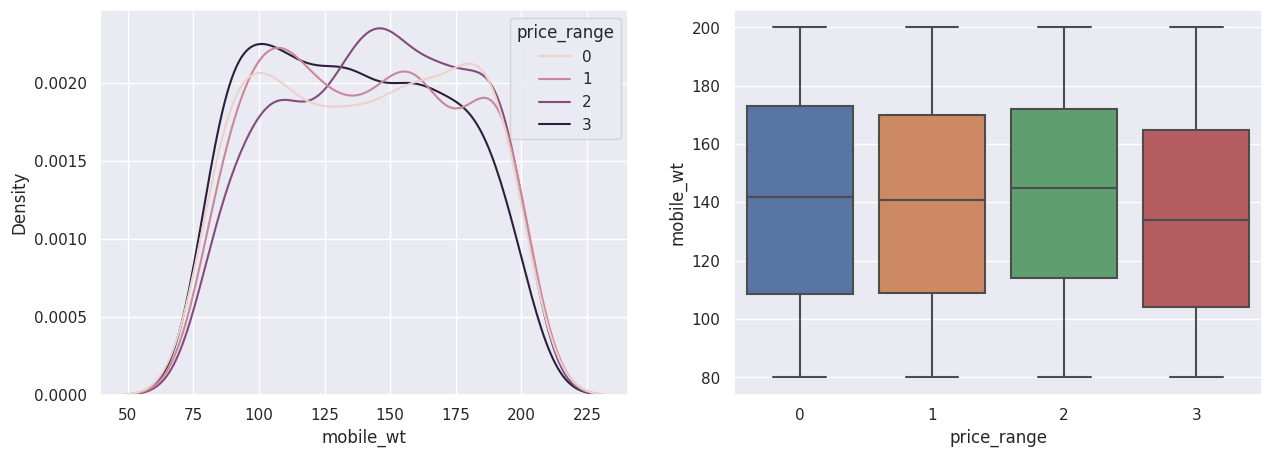

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

Mobile weight is reduced a little bit in the Price category-3 which means costly phones are lighter. A little variation is observed here in all price_ranges.

# PC (Primary camera Megapixels

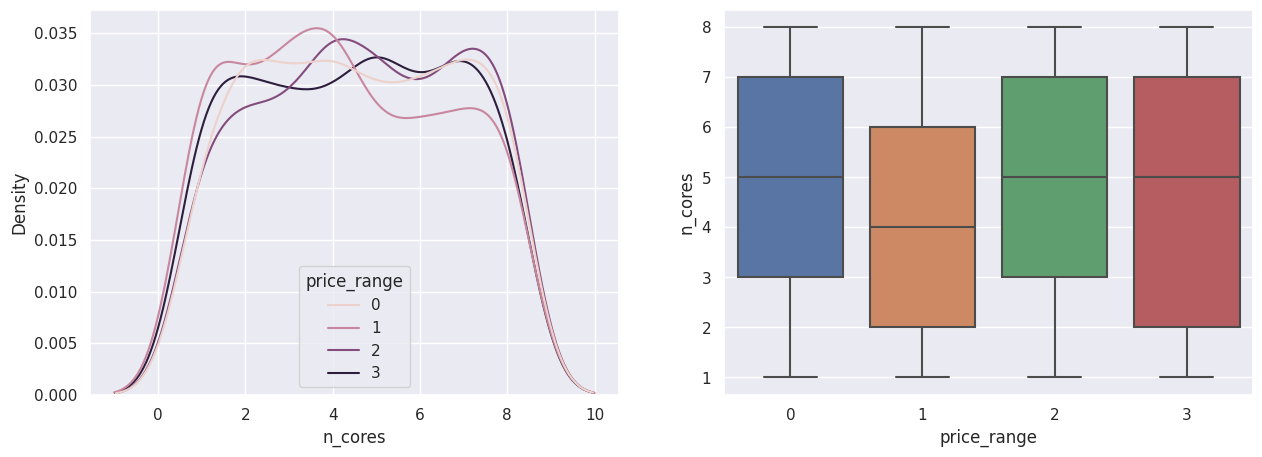

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='n_cores', ax=axs[1])
plt.show()

Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.

# Screen size 

Let's convert screen_size from cm to inches, since in real life we use inches to tell a screen size

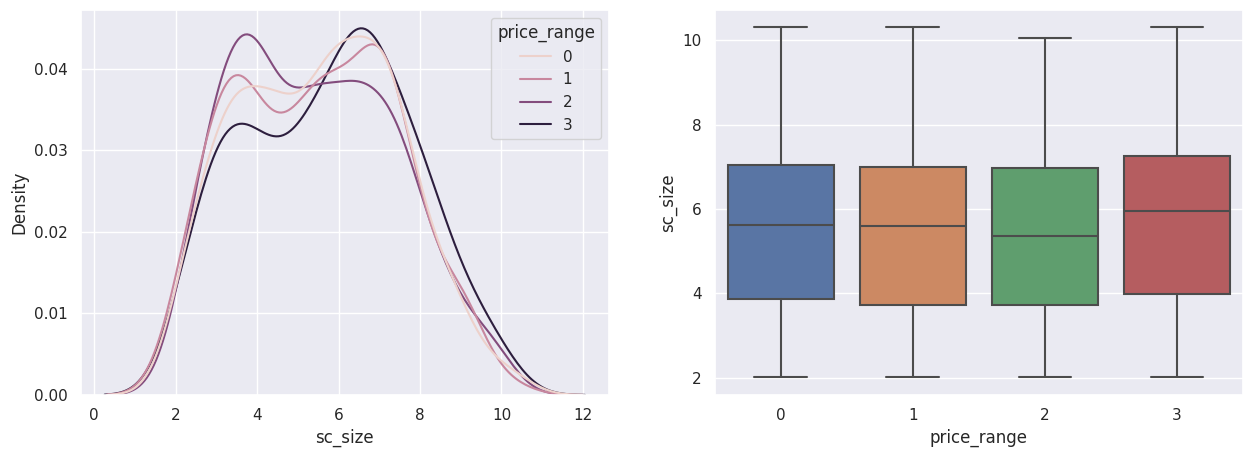

In [ ]:
# Defining new variable sc_size

df_data['sc_size'] = np.sqrt((df_data['sc_h']**2) + (df_data['sc_w']**2))
df_data['sc_size'] = round(df_data['sc_size']/2.54, 2)
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='sc_size', ax=axs[1])
plt.show()

Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories

# **pixel_width**

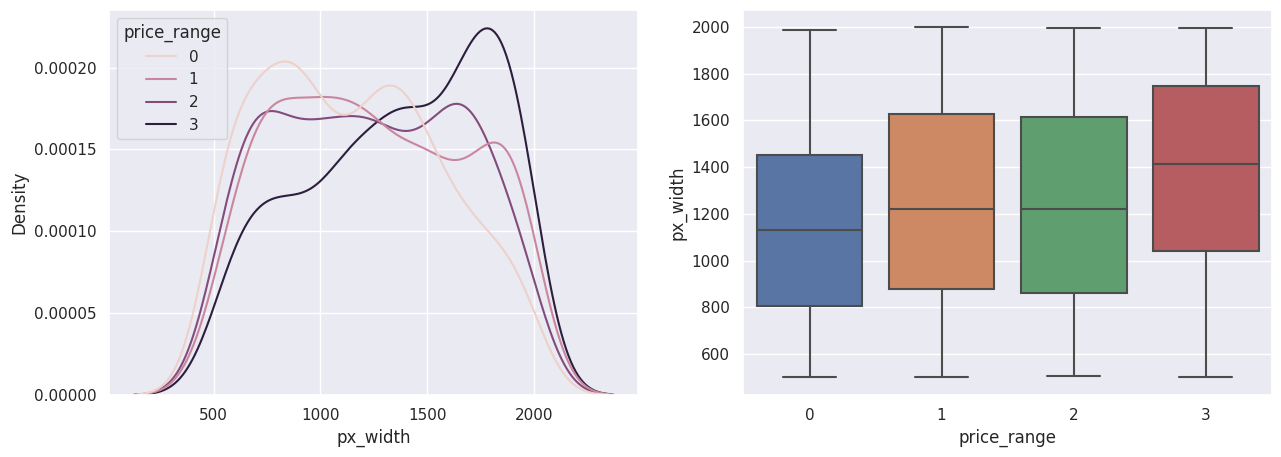

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='px_width', ax=axs[1])
plt.show()

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

# **px_height**(pixel resolution height)

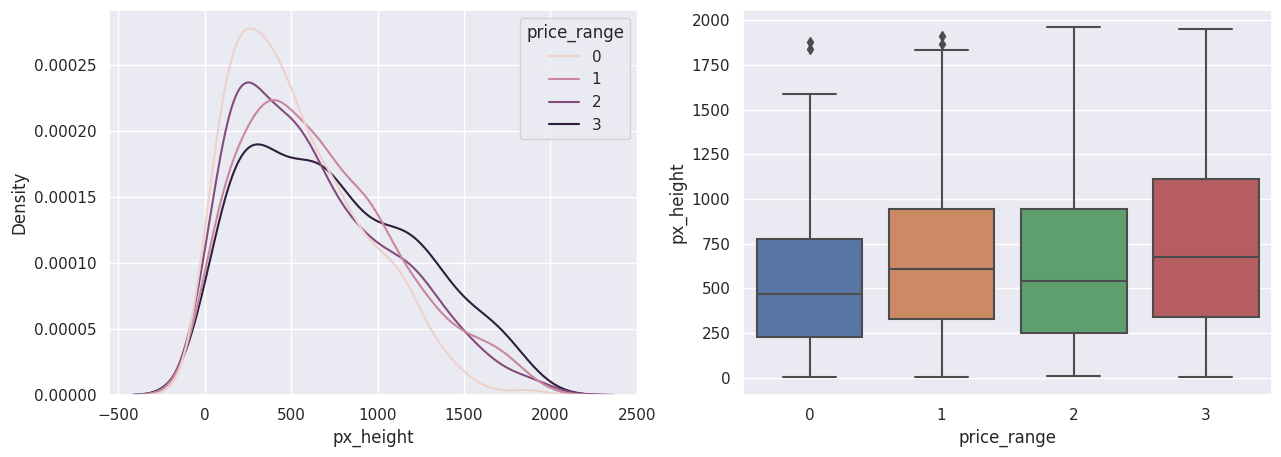

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='px_height', ax=axs[1])
plt.show()

little variation in pixel_height

In [ ]:
# Let's drop sc_h and s_w
df_data.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

In [ ]:
binary_features = [ 'four_g', 'three_g']

In [ ]:
#to check only those column which have null in them
df[[i for i in df.columns if df[i].isnull().sum()>0]].isnull().sum()

In [ ]:
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2 )
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

# Feature Selection

In [ ]:
corr= df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)

In [ ]:
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X=df.drop('price_range',axis=1)
y=df["price_range"] # Target variable

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
     
#select the  top 12 important features by using SelectKbest python lab
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)

The **SelectKBest** method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training.

**chi-squared**  can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

In [ ]:
# creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# conacatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [ ]:
# Check dataframe
featureScores
     

In [ ]:

# 12 features with highest chi squared statistic 
print(featureScores.nlargest(12,'Score'))

In [ ]:
# 12 features with highest chi squared statistic are selected as independent variables.
X=df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','talk_time','fc','n_cores','pc','sc_size','touch_screen']]

# dependent varaible
y=df['price_range']

In [ ]:
# splitting the data into Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# **1)Gradient Boosting Classifier:**
i) Gradient Boosting Algorithm is generally used when we want to decrease the Bias error. ii) Gradient Boosting Algorithm can be used in regression as well as classification problems.



In [ ]:
# creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)
     


In [ ]:
# fittng/training the data.
gbc.fit(X_train,y_train)
     

In [ ]:
# predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [ ]:
# checking the accuracy score of train data.
accuracy_score(y_train,y_train_pred)

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

In [ ]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

In [ ]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

## Using hyperparameter tuning.

In [ ]:
# Creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)
     

In [ ]:
# para_grid values to pass in gridsearchcv.
grid_values={'learning_rate':[0.5,1,1.5,2],
             'min_samples_split':range(4,10)
          
             }
     


In [ ]:
# Applying GridSearchCV
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(X_train,y_train)

In [ ]:
# Getting best parameters
gbc_tune.best_params_

In [ ]:
# getting best estimators
gbc_tune.best_estimator_    #A good estimator is one that gives UNBIASED, EFFICIENT and CONSISTENT estimates.

In [ ]:
# aplying best estimarors
gbc_optimal=GradientBoostingClassifier(learning_rate=0.5,random_state=0,min_samples_split=7)
gbc_optimal.fit(X_train,y_train)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=gbc_optimal.predict(X_train)  
y_pred=gbc_optimal.predict(X_test)
     

In [ ]:
# train set accuracy score
accuracy_score(y_train,y_train_pred)

In [ ]:
# test set accuracy score
accuracy_score(y_test,y_pred)
     

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

In [ ]:
# printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))